<a href="https://colab.research.google.com/github/OsamaMohamed4/uber-predication/blob/main/final_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Understanding

Objective:

The aim of this dataset called New York taxi fare based on the airports mentioned in the data dataset is to provide a comprehensive collection of data on taxi rides within New York City. This dataset is valuable for analyzing and understanding various factors influencing taxi fare amounts, enabling researchers and analysts to develop models that accurately predict fare costs based on relevant input features.

Data Explaining:

The dataset contains several columns with information about taxi service.The detailed data is given below:

'User ID': A unique identifier for each user.

'User Name': The name of the user.

'Driver Name': The name of the taxi driver.

'Car Condition': The condition of the taxi car.

'Weather': Information about the weather conditions during the trip.

'Traffic Condition': Information about the traffic conditions during the trip.

'key': A unique identifier for each trip.

'fare_amount': The fare amount charged for the trip.

'pickup_datetime': The date and time when the trip started.

'pickup_longitude': The longitude coordinate of the pickup location.

'pickup_latitude': The latitude coordinate of the pickup location.

'dropoff_longitude': The longitude coordinate of the dropoff location.

'dropoff_latitude': The latitude coordinate of the dropoff location.

'passenger_count': The number of passengers in the taxi.

'hour': The hour of the day when the trip started.

'day': The day of the month when the trip started.

'month': The month when the trip started.

'weekday': The day of the week when the trip started.

'year': The year when the trip started.

'jfk_dist': The distance from the pickup
location to John F. Kennedy International Airport.

'ewr_dist': The distance from the pickup location to Newark Liberty International Airport.

'lga_dist': The distance from the pickup location to LaGuardia Airport.

'sol_dist': The distance from the pickup location to Statue of Liberty.

'nyc_dist': The distance from the pickup location to the center of New York City.

'distance': The total distance of the trip.

'bearing': The direction of travel from the pickup point to the dropoff point.


In [ ]:
!unzip /content/drive/MyDrive/final_internship_data.zip

Archive:  /content/drive/MyDrive/final_internship_data.zip
  inflating: final_internship_data.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

**DATA** **PREPOSSESING** & **EDA**

In [ ]:
df = pd.read_csv('/content/final_internship_data.csv')

In [ ]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [ ]:
df['Car Condition'].value_counts()

Car Condition
Very Good    125312
Bad          124978
Good         124968
Excellent    124742
Name: count, dtype: int64

In [ ]:
df['Weather'].value_counts()

Weather
sunny     100433
cloudy    100062
rainy      99972
stormy     99955
windy      99578
Name: count, dtype: int64

In [ ]:
df['Traffic Condition'].value_counts()

Traffic Condition
Congested Traffic    166847
Dense Traffic        166584
Flow Traffic         166569
Name: count, dtype: int64

SUMMARY STATISTICS

In [ ]:
describe=df.describe().T
describe['nunique']=df.nunique()
describe['NULLS']=df.isna().sum()
describe

,count,mean,std,min,25%,50%,75%,max,nunique,NULLS
fare_amount,500000.0,11.358361,9.916617,-44.900000,6.000000,8.500000,12.500000,500.000000,1688,0
pickup_longitude,500000.0,-1.265712,0.206941,-52.119764,-1.291405,-1.291226,-1.290970,37.360538,95037,0
pickup_latitude,500000.0,0.696740,0.140909,-54.389440,0.710958,0.711268,0.711520,29.724576,119115,0
dropoff_longitude,499995.0,-1.265755,0.205903,-59.049665,-1.291393,-1.291197,-1.290908,0.712985,108283,5
dropoff_latitude,499995.0,0.696675,0.128997,-44.676047,0.710943,0.711277,0.711538,7.061893,135053,5
passenger_count,500000.0,1.683428,1.307395,0.000000,1.000000,1.000000,2.000000,6.000000,7,0
hour,500000.0,13.510834,6.511571,0.000000,9.000000,14.000000,19.000000,23.000000,24,0
day,500000.0,15.684206,8.681066,1.000000,8.000000,16.000000,23.000000,31.000000,31,0
month,500000.0,6.268650,3.437815,1.000000,3.000000,6.000000,9.000000,12.000000,12,0
weekday,500000.0,3.042008,1.949240,0.000000,1.000000,3.000000,5.000000,6.000000,7,0


CHECk & DROP HIGH CARDINALITY AND USELESS FEATURES

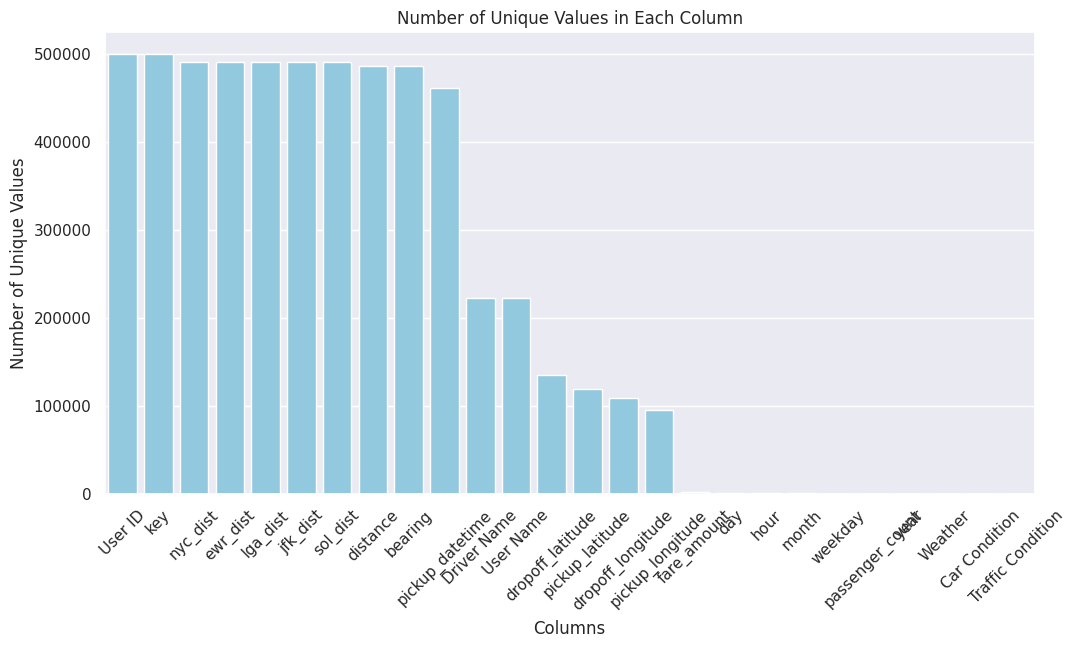

In [ ]:
sorted_unique_values = df.nunique().sort_values(ascending=False)

# Set the style for the plot (optional)
#sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_unique_values.index, y=sorted_unique_values.values, color='skyblue')

plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df['fare']=df['fare_amount']
cols_to_drop=['User ID','User Name','Driver Name','key','pickup_datetime','fare_amount']
df.drop(cols_to_drop,axis=1,inplace=True)

MISSING DATA

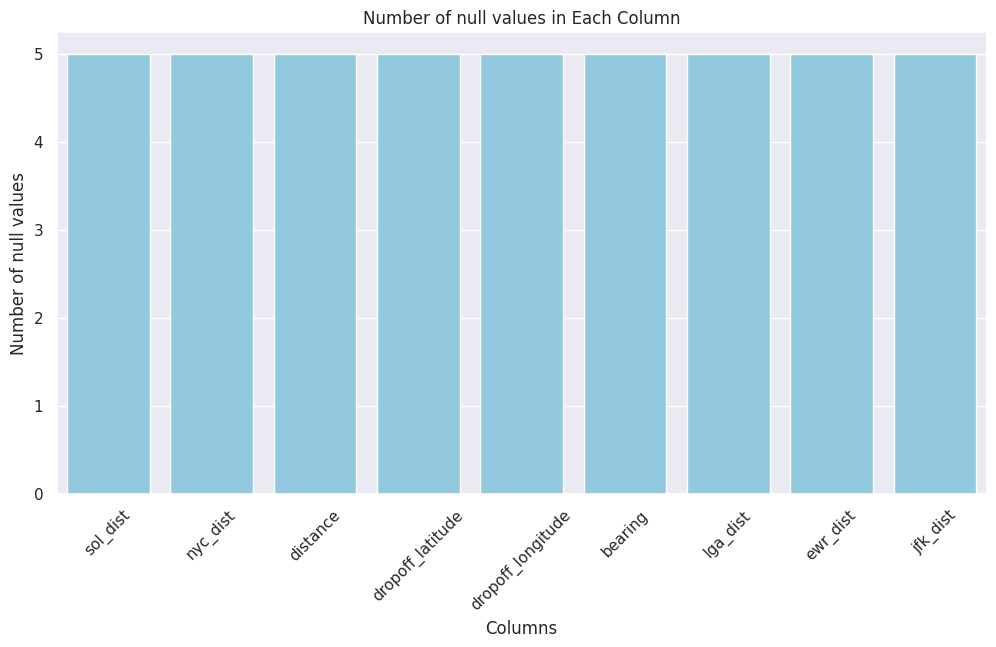

In [ ]:
plt.figure(figsize=(12, 6))

null_values=df.isna().sum().sort_values(ascending=False)
null_values=null_values[null_values>0]
sns.barplot(x=null_values.index, y=null_values.values, color='skyblue')

plt.xlabel('Columns')
plt.ylabel('Number of null values')
plt.title('Number of null values in Each Column')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df.dropna(inplace=True)

DUPLICATIONS

In [ ]:
df.duplicated().sum()

0

VISUALIZING AND HANDLING DATA FOR EACH FEATURE

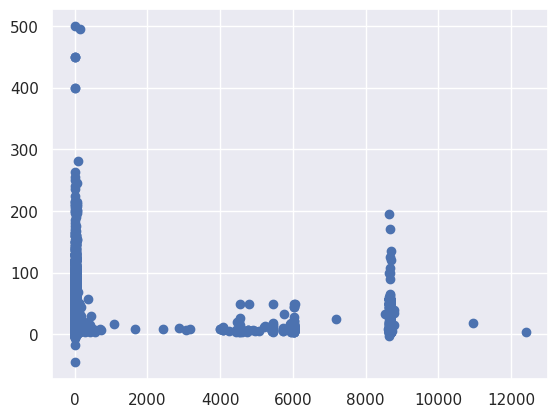

In [ ]:
plt.scatter(df['distance'],df['fare'])

<ipython-input-17-10245c937679>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'],ax=ax[0][0])
<ipython-input-17-10245c937679>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'],ax=ax[1][0])
<ipython-input-17-10245c937679>:16: UserWarning: 

`distplot` is a deprecated func

Text(0.5, 1.0, 'box_plot of bearing')

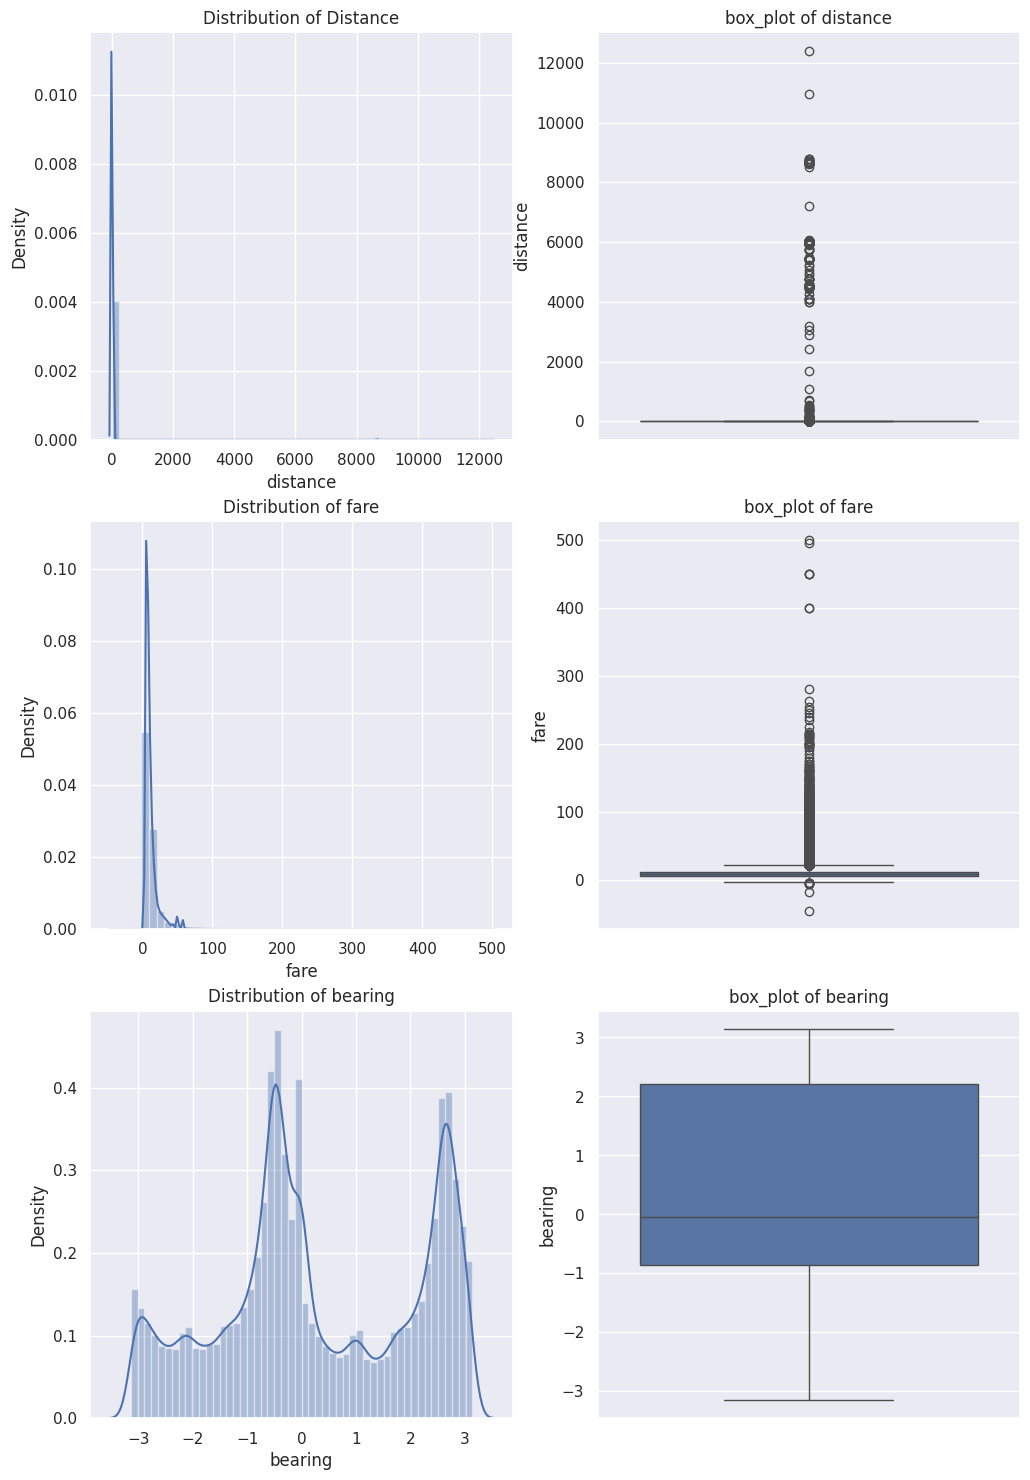

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 6*3))
sns.distplot(df['distance'],ax=ax[0][0])
ax[0][0].set_title('Distribution of Distance')


sns.boxplot(y=df['distance'],ax=ax[0][1])
ax[0][1].set_title('box_plot of distance')

sns.distplot(df['fare'],ax=ax[1][0])
ax[1][0].set_title('Distribution of fare')


sns.boxplot(y=df['fare'],ax=ax[1][1])
ax[1][1].set_title('box_plot of fare')

sns.distplot(df['bearing'],ax=ax[2][0])
ax[2][0].set_title('Distribution of bearing')


sns.boxplot(y=df['bearing'],ax=ax[2][1])
ax[2][1].set_title('box_plot of bearing')

it looks like there is outlier problem at zero
at distance of 0 zero there is two cases case one when pickup & dropoff lat and long = 0 that means that the reservation was canceled which is normal but the other case when pickup & dropoff lat and long have values and the lat of the pick up and distnation are the same and also the long is the same so this a problem i will drop them

In [ ]:
#drop the trips that have wrong measurements
ind=df[(df['distance']==0)&(df['pickup_longitude']!=0) ].index
df.drop(ind,axis=0,inplace=True)

In [ ]:
# drop outliers in continious cols
for col in ['fare','distance','bearing',"jfk_dist","ewr_dist","lga_dist","sol_dist","nyc_dist"]:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers=(df[col]<q1-(1.5*iqr))|(df[col]>q3+(1.5*iqr))
    df=df[~outliers]

<ipython-input-20-10245c937679>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'],ax=ax[0][0])
<ipython-input-20-10245c937679>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'],ax=ax[1][0])
<ipython-input-20-10245c937679>:16: UserWarning: 

`distplot` is a deprecated func

Text(0.5, 1.0, 'box_plot of bearing')

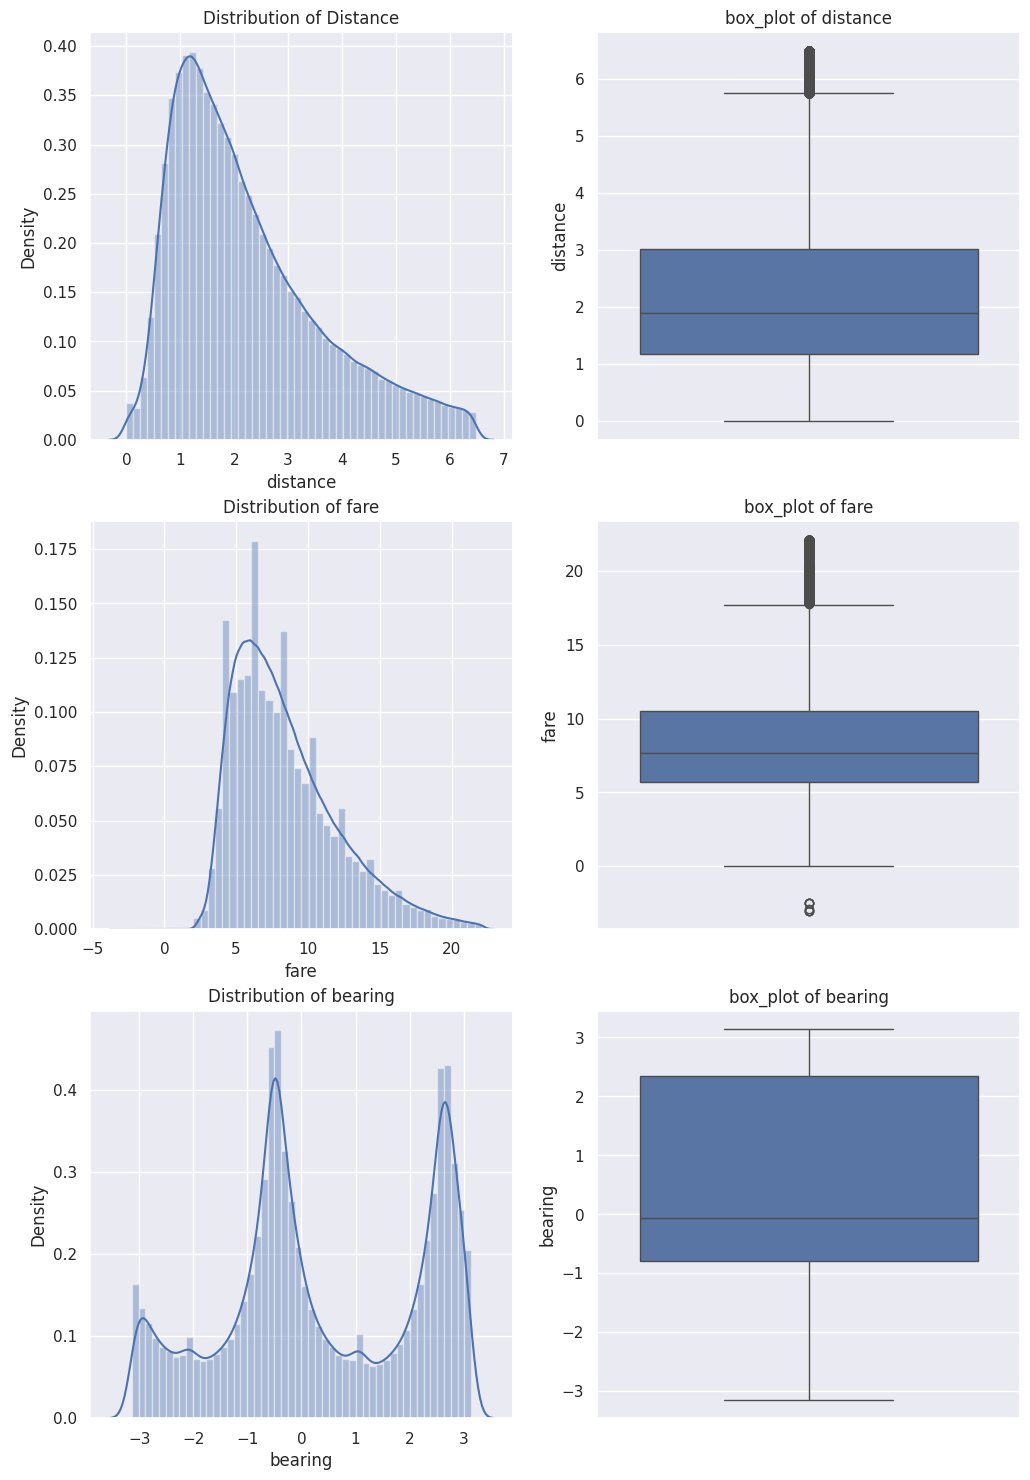

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 6*3))
sns.distplot(df['distance'],ax=ax[0][0])
ax[0][0].set_title('Distribution of Distance')


sns.boxplot(y=df['distance'],ax=ax[0][1])
ax[0][1].set_title('box_plot of distance')

sns.distplot(df['fare'],ax=ax[1][0])
ax[1][0].set_title('Distribution of fare')


sns.boxplot(y=df['fare'],ax=ax[1][1])
ax[1][1].set_title('box_plot of fare')

sns.distplot(df['bearing'],ax=ax[2][0])
ax[2][0].set_title('Distribution of bearing')


sns.boxplot(y=df['bearing'],ax=ax[2][1])
ax[2][1].set_title('box_plot of bearing')

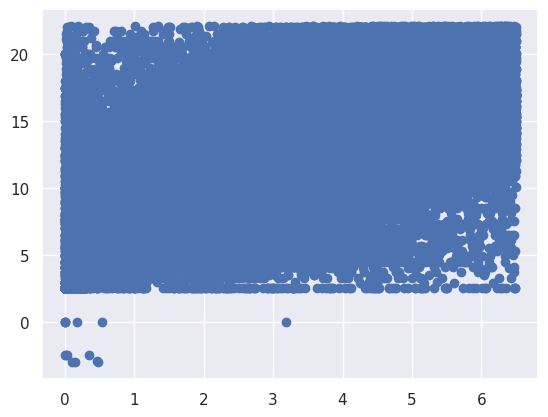

In [ ]:
plt.scatter(df['distance'],df['fare'])

In [ ]:
df[['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,396485.0,-1.291230,0.000277,-1.292426,-1.291418,-1.291247,-1.291055,-1.289814
pickup_latitude,396485.0,0.711269,0.000353,0.709742,0.711029,0.711287,0.711503,0.712622
dropoff_longitude,396485.0,-1.291218,0.000291,-1.292438,-1.291410,-1.291236,-1.291047,-1.289765
dropoff_latitude,396485.0,0.711275,0.000370,0.709751,0.711033,0.711298,0.711514,0.712676


it looks like we have no outliers in lat_long

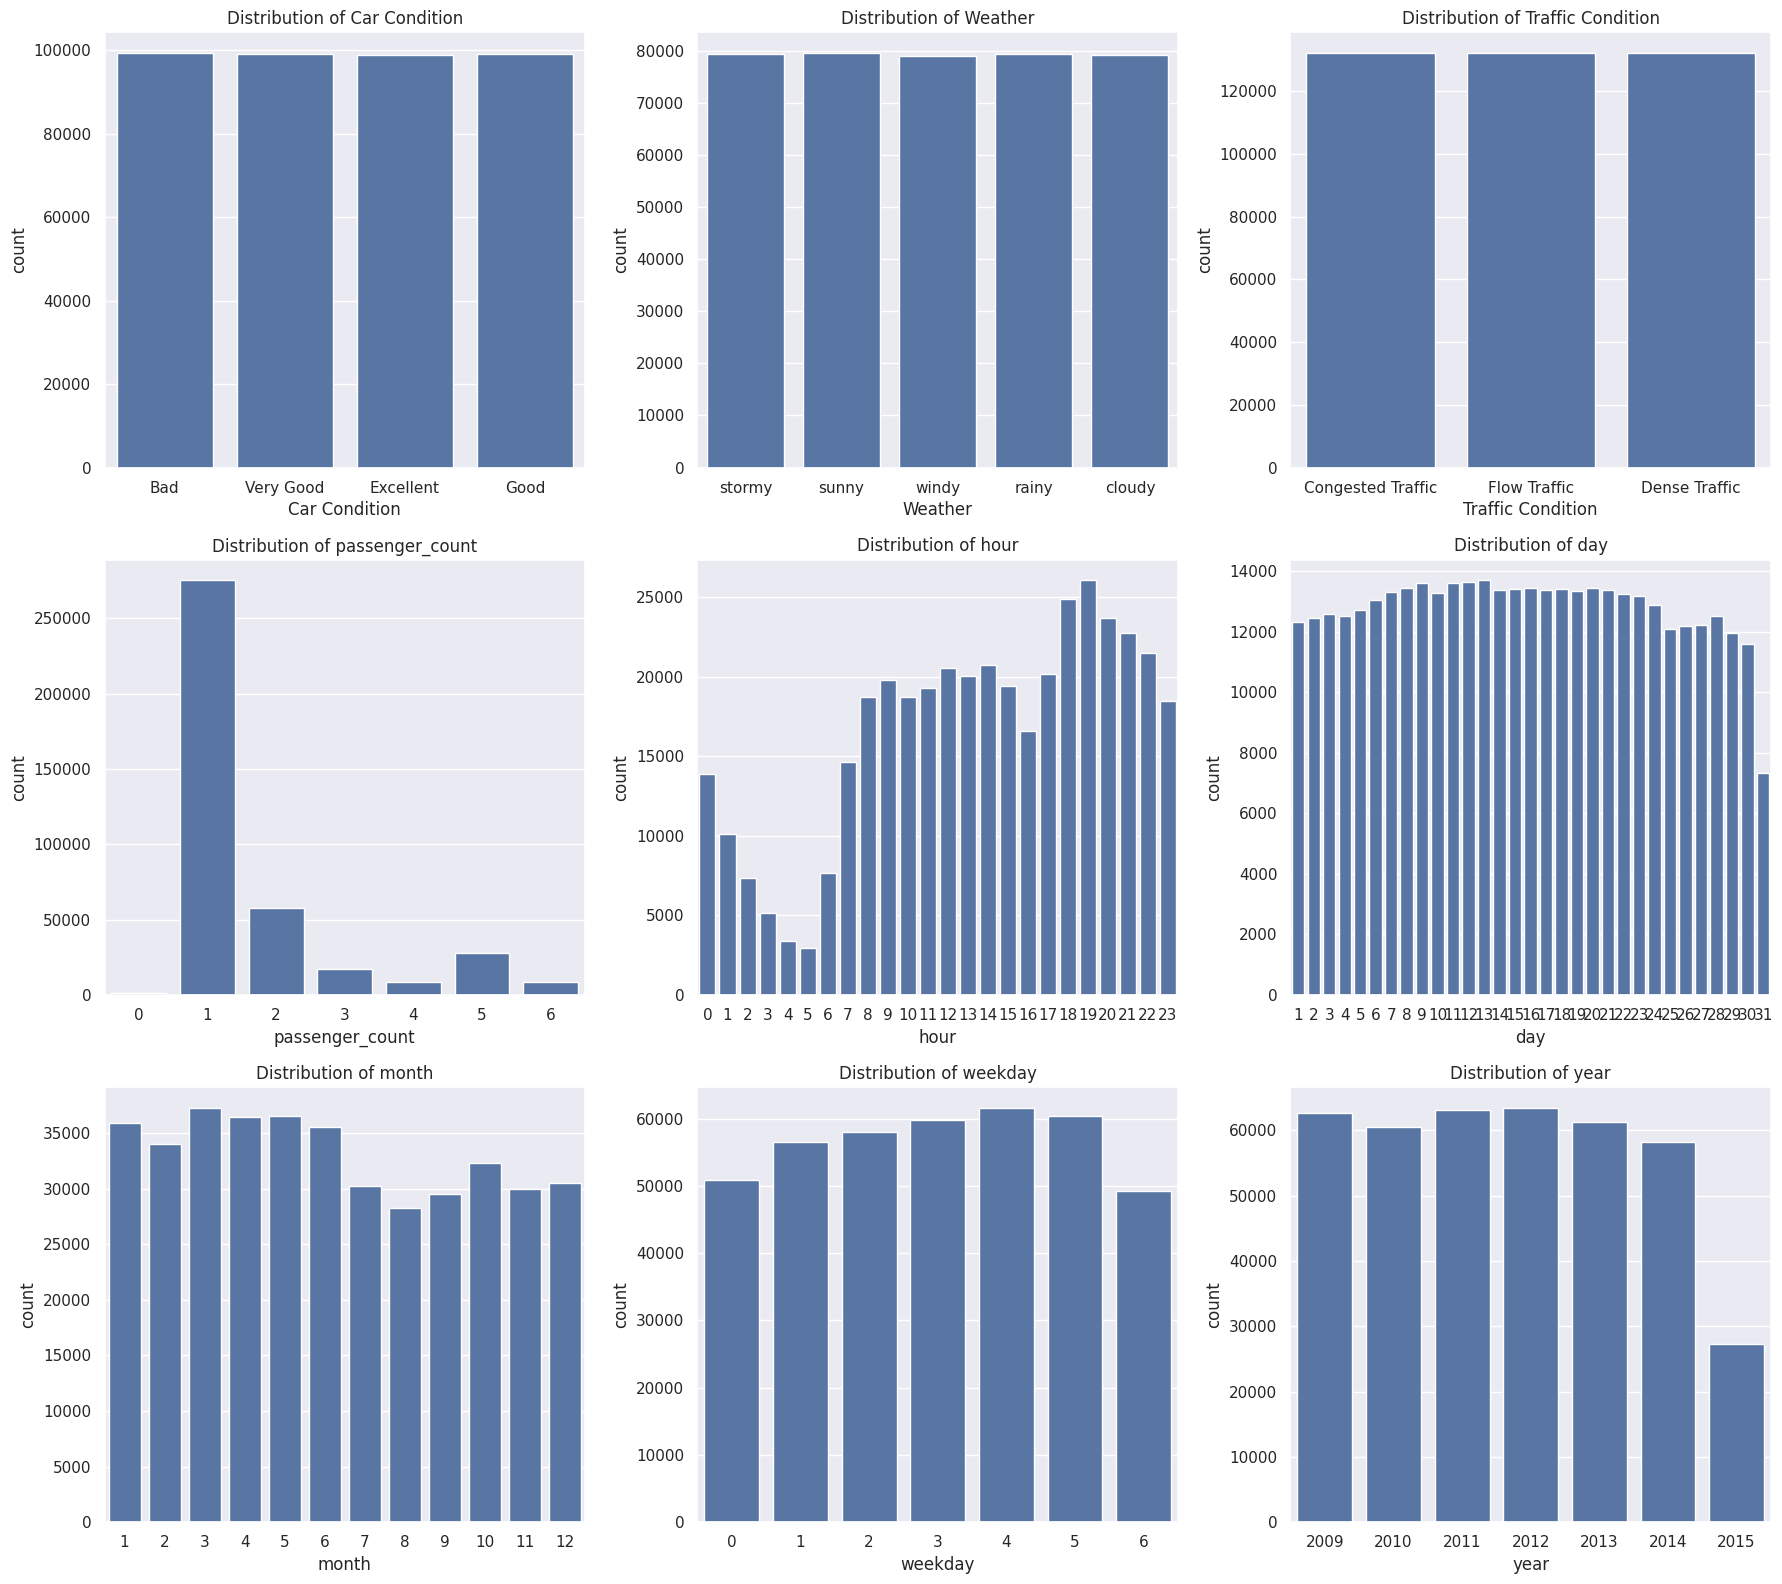

In [ ]:
d_cols=['Car Condition', 'Weather', 'Traffic Condition',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year']
fig,ax= plt.subplots(3, 3, figsize=(18, 16))
ax=ax.flatten()
for i, col in enumerate(d_cols):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

now fo lat and long values it looks like it is converted from degrees to radius we should make that the values are in normal ranges for the lat and long
the normal range in degrees metric is
The range for latitude is from -90 degrees to +90 degrees.
The range for longitude is from -180 degrees to +180 degrees.
if we converted to radius same as out metric To convert degrees to radians, you use the conversion factor that degrees =math.pi /180 * radians
so our new ranges are
Latitude ranges from approximately −1.5708 to 1.5708
Longitude ranges from approximately -3.1416 to 3.1416 radians when expressed in radians.

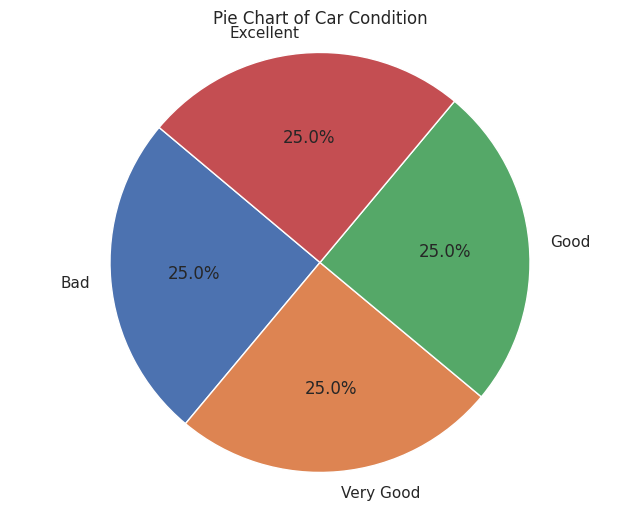

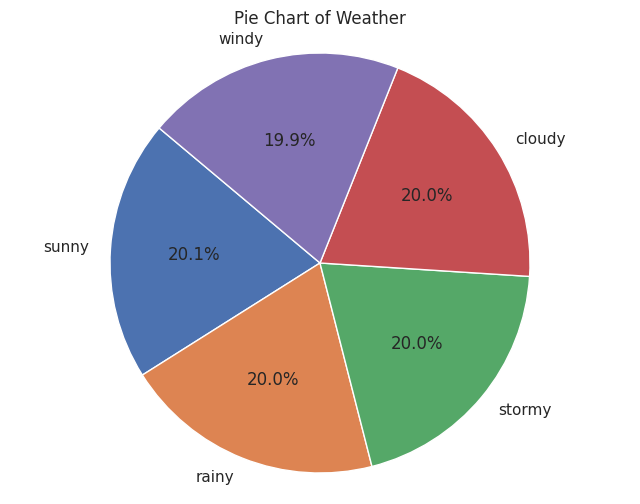

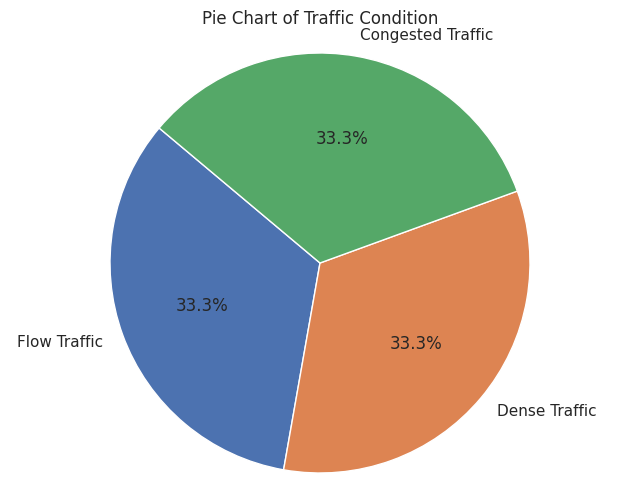

In [ ]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    category_counts = df[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

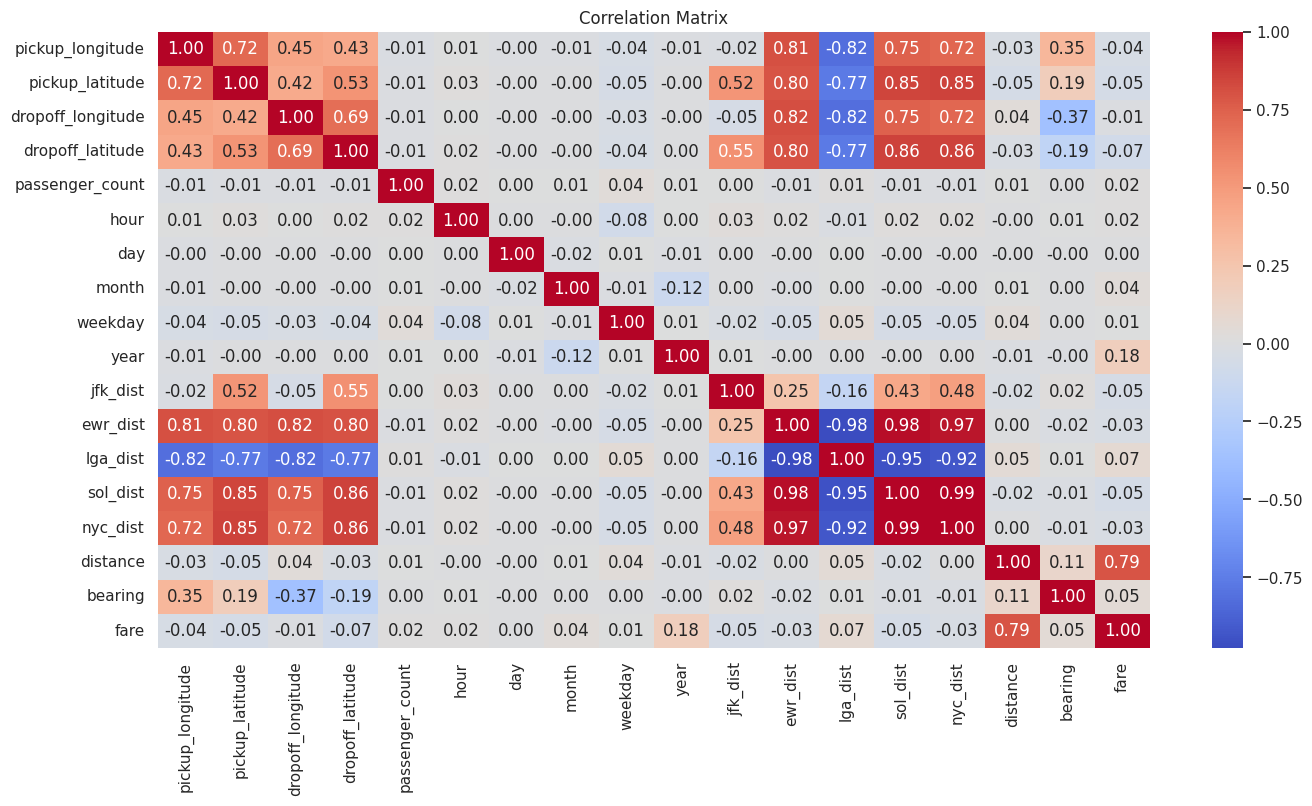

In [ ]:
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['day_or_night'] = df['hour'].apply(lambda x: 'am' if x < 12 else 'pm')
df['is_alone'] = df['passenger_count'].apply(lambda x: 'true' if x == 1 else 'false')

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


# Nominal columns: One-hot encoding
nominal_cols = ['Weather', 'day_or_night', 'is_alone']
nominal_encoder = OneHotEncoder(drop='first', sparse=False)
df_nominal_encoded = pd.DataFrame(nominal_encoder.fit_transform(df[nominal_cols]), columns=nominal_encoder.get_feature_names_out(nominal_cols))

# Ordinal columns: Ordinal encoding
ordinal_cols = ['Car Condition', 'Traffic Condition']
ordinal_encoder = OrdinalEncoder(categories='auto')
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])
df.drop(nominal_cols,axis=1,inplace=True)

df=pd.concat([df,df_nominal_encoded],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,Car Condition,Traffic Condition,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,...,nyc_dist,distance,bearing,fare,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,day_or_night_pm,is_alone_true
0,0.0,0.0,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,...,9.847344,1.389525,2.599961,5.7,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,2.0,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,...,7.703421,2.799270,0.133905,7.7,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,...,15.600745,1.999157,-0.502703,5.3,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,...,7.649541,3.787239,-0.674251,12.1,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,2.0,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,...,10.993150,1.555807,-0.342260,7.5,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X=scaled_df.drop('fare',axis=1)
y=scaled_df['fare']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Initialize Random Forest Regressor and SelectFromModel for feature selection
clf = RandomForestRegressor(n_estimators=100, random_state=42)
sfm = SelectFromModel(clf)

# Fit SelectFromModel and get selected features
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)

# Update X to include only selected features
X_selected = X[selected_features]

Selected features: Index(['year', 'distance', 'bearing'], dtype='object')


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import joblib

# Define and train models, then calculate metrics

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, np.ravel(y_train))
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return mse, rmse, mae, r2, model

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=10, min_child_weight=4,
                            subsample=1.0, colsample_bytree=0.75, gamma=1, reg_alpha=0, reg_lambda=1,
                            random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=10,
                                                   min_samples_split=2, min_samples_leaf=1, subsample=1.0,
                                                   random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, learning_rate=0.01, random_state=42),
    'Lasso': Lasso(alpha=1.0, random_state=42)
}

# Evaluate each model and store results
results = []
best_model = None
best_r2 = -np.inf

for name, model in models.items():
    mse, rmse, mae, r2, trained_model = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })
    # Update the best model if current model is better based on R²
    if r2 > best_r2:
        best_r2 = r2
        best_model = trained_model

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.pkl')
    print(f"The best model ({best_model}) has been saved as 'best_model.pkl'.")

# Print results
print(results_df)


The best model (RandomForestRegressor(n_jobs=-1, random_state=42)) has been saved as 'best_model.pkl'.
               Model       MSE      RMSE       MAE        R²
0      Random Forest  0.004769  0.069061  0.046770  0.772619
1            XGBoost  0.008521  0.092307  0.069087  0.593781
2  Gradient Boosting  0.007406  0.086056  0.063596  0.646933
3           AdaBoost  0.007428  0.086185  0.062820  0.645876
4              Lasso  0.020976  0.144832  0.114511 -0.000047
